## 股票数据分析

具体详见 https://github.com/kamidox/stock-analysis

这里假设数据已经下载下来，并且保存在 yahoo-data 目录下。

## 分析波动幅度

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
datadir = 'yahoo-data'
fname = '002001.csv'
data = pd.read_csv(os.path.join(datadir, fname), index_col='Date', parse_dates=True)
data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-05-20,18.82000,19.46000,18.71000,19.34000,13265400,19.34000
2016-05-19,19.12000,19.52000,18.90000,18.98000,12581300,18.98000
2016-05-18,19.50000,20.10000,18.83000,19.23000,22042500,19.23000
2016-05-17,19.73000,20.23000,19.65000,19.77000,20469800,19.77000
2016-05-16,19.43000,19.64000,19.20000,19.62000,10963200,19.62000
2016-05-13,19.70000,19.94000,19.27000,19.40000,15655100,19.40000
2016-05-12,18.81000,19.95000,18.71000,19.88000,19814300,19.88000
2016-05-11,19.50000,19.85000,19.12000,19.28000,23742200,19.28000
2016-05-10,18.86000,19.17000,18.23000,19.07000,20858200,19.07000


In [3]:
## 使用 resample 针对复权收盘价进行重采样
adj_price = data['Adj Close']
adj_price

Date
2016-05-20    19.34000
2016-05-19    18.98000
2016-05-18    19.23000
2016-05-17    19.77000
2016-05-16    19.62000
2016-05-13    19.40000
2016-05-12    19.88000
2016-05-11    19.28000
2016-05-10    19.07000
2016-05-09    18.67000
2016-05-06    18.70000
2016-05-05    20.49000
2016-05-04    20.42000
2016-05-03    20.99000
2016-05-02    20.61000
2016-04-29    20.61000
2016-04-28    20.40000
2016-04-27    21.44000
2016-04-26    21.13000
2016-04-25    20.92000
2016-04-22    21.71000
2016-04-21    21.42000
2016-04-20    19.97000
2016-04-19    20.55000
2016-04-18    20.91000
2016-04-15    20.71000
2016-04-14    20.40000
2016-04-13    20.50000
2016-04-12    20.49000
2016-04-11    21.57000
                ...   
2004-08-05     0.98194
2004-08-04     0.99704
2004-08-03     0.99201
2004-08-02     0.98474
2004-07-30     0.97914
2004-07-29     0.97691
2004-07-28     0.94671
2004-07-27     0.91148
2004-07-26     0.93944
2004-07-23     0.96293
2004-07-22     0.95230
2004-07-21     0.98418
2004-0

In [4]:
resampled = adj_price.resample('m', how='ohlc')
resampled

,open,high,low,close
Date,,,,
2004-06-30,1.39966,1.39966,1.06414,1.06414
2004-07-31,1.04960,1.04960,0.91148,0.97914
2004-08-31,0.98474,0.99704,0.77951,0.80244
2004-09-30,0.80244,0.96069,0.74876,0.91596
2004-10-31,0.91596,1.00263,0.81083,0.84270
2004-11-30,0.82201,0.89471,0.81362,0.82201
2004-12-31,0.81810,0.85389,0.74428,0.74428
2005-01-31,0.74428,0.76497,0.61008,0.61008
2005-02-28,0.61399,0.77784,0.61399,0.77784


In [5]:
(resampled.high - resampled.low) / resampled.low

Date
2004-06-30    0.315297
2004-07-31    0.151534
2004-08-31    0.279060
2004-09-30    0.283041
2004-10-31    0.236548
2004-11-30    0.099666
2004-12-31    0.147270
2005-01-31    0.253885
2005-02-28    0.266861
2005-03-31    0.269335
2005-04-30    0.129689
2005-05-31    0.303518
2005-06-30    0.257886
2005-07-31    0.139452
2005-08-31    0.261976
2005-09-30    0.075246
2005-10-31    0.340526
2005-11-30    0.131639
2005-12-31    0.071430
2006-01-31    0.141301
2006-02-28    0.173618
2006-03-31    0.151135
2006-04-30    0.127417
2006-05-31    0.268993
2006-06-30    0.166040
2006-07-31    0.247421
2006-08-31    0.150091
2006-09-30    0.093990
2006-10-31    0.156016
2006-11-30    0.163225
                ...   
2013-12-31    0.076190
2014-01-31    0.128657
2014-02-28    0.115819
2014-03-31    0.213381
2014-04-30    0.153409
2014-05-31    0.071102
2014-06-30    0.084388
2014-07-31    0.189517
2014-08-31    0.086587
2014-09-30    0.037749
2014-10-31    0.086667
2014-11-30    0.058001
2014-1

## 增长曲线

In [6]:
# 600690.ss 000951.sz 002001.sz
stockid = '600690.sz'
stockfile = '600690.csv'

In [7]:
ds = pd.read_csv(os.path.join('yahoo-data', stockfile), index_col='Date', parse_dates=True)
ds.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-05-20,8.74,9.15,8.74,9.14,55390400,9.14
2016-05-19,8.84,9.05,8.81,8.84,34785900,8.84
2016-05-18,8.82,8.93,8.65,8.88,44254300,8.88
2016-05-17,9.08,9.08,8.82,8.83,42392200,8.83
2016-05-16,8.90,9.08,8.80,9.07,59749500,9.07


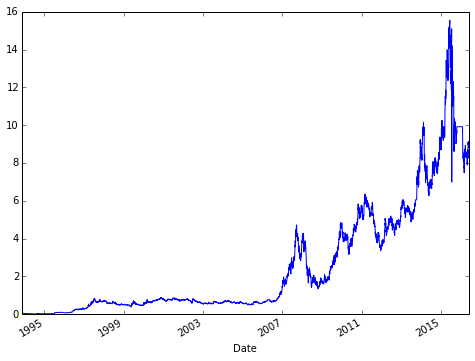

In [8]:
adj_price = ds['Adj Close']
adj_price.plot(figsize=(8, 6))

### 增长倍数

#### 最大增长倍数及最大年化复合增长率

计算最低价和最高价之间的收盘价比较，以及增长的倍数和年化复全增长率，这个反应的是一个股票最好的情况下的投资收益情况。

In [9]:
# 最高增长倍数
total_max_growth = adj_price.max() / adj_price.min()
total_max_growth

1113.2977809591985

In [10]:
# 最大年均复合增长率
min_date = adj_price.argmin()
max_date = adj_price.argmax()
max_growth_per_year = total_max_growth ** (1.0 / (max_date.year - min_date.year))
max_growth_per_year

1.3966150915746656

### 当前增长倍数及复合增长率

计算上市时的收盘价与当前的收盘价比较，增长的倍数和年化复全增长率。

In [11]:
# 当前平均增长倍数
total_growth = adj_price.ix[0] / adj_price.ix[-1]
total_growth

180.205047318612

In [12]:
# 年复合增长倍数
old_date = adj_price.index[-1]
now_date = adj_price.index[0]
growth_per_year = total_growth ** (1.0 / (now_date.year - old_date.year))
growth_per_year

1.2533628673066715

### 平均年化增长率

计算每年的增长率，然后再求平均值。也可以计算每月的增长率，再求平均值，可以看到更短的一些周期变化。

In [13]:
price_in_years = adj_price.to_period(freq='A').groupby(level=0).first()
price_in_years

Date
1993    0.03573
1994    0.02459
1995    0.07254
1996    0.27879
1997    0.69135
1998    0.50219
1999    0.48011
2000    0.80252
2001    0.78662
2002    0.53786
2003    0.60910
2004    0.56913
2005    0.60712
2006    1.50079
2007    3.80700
2008    1.67358
2009    4.82062
2010    5.76779
2011    3.70347
2012    5.72073
2013    8.85739
2014    8.96458
2015    9.92000
2016    9.14000
Freq: A-DEC, Name: Adj Close, dtype: float64

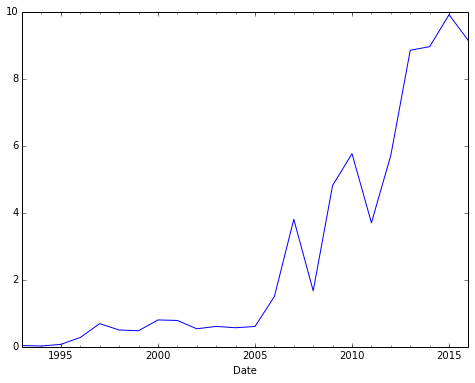

In [14]:
price_in_years.plot(figsize=(8,6))

In [15]:
# 这里的关键信息：
# 计算年化收益率时，diff 应该要除以前一年的价格，即在前一年的价格的基础上上涨了多少，而不是在当前年的价格。
diff = price_in_years.diff()
rate_in_years =  diff / (price_in_years - diff)
rate_in_years

Date
1993         NaN
1994   -0.311783
1995    1.949980
1996    2.843259
1997    1.479824
1998   -0.273610
1999   -0.043967
2000    0.671534
2001   -0.019813
2002   -0.316239
2003    0.132451
2004   -0.065621
2005    0.066751
2006    1.471982
2007    1.536664
2008   -0.560394
2009    1.880424
2010    0.196483
2011   -0.357905
2012    0.544695
2013    0.548297
2014    0.012102
2015    0.106577
2016   -0.078629
Freq: A-DEC, Name: Adj Close, dtype: float64

In [16]:
rate_in_years.mean()

0.49622003984599322

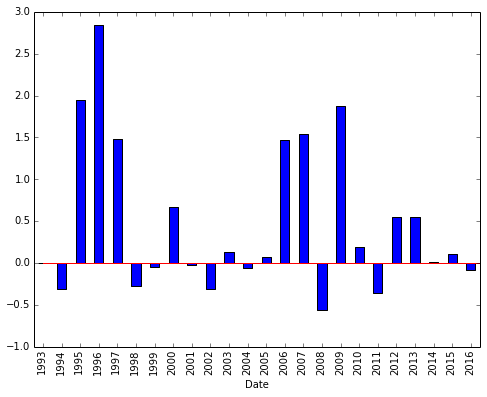

In [17]:
rate_in_years.plot(kind='bar', figsize=(8,6))
X = [0, len(rate_in_years)]
Y = [0, 0]
plt.plot(X, Y, color='red', linestyle='-')